I =  0.1879429205264874


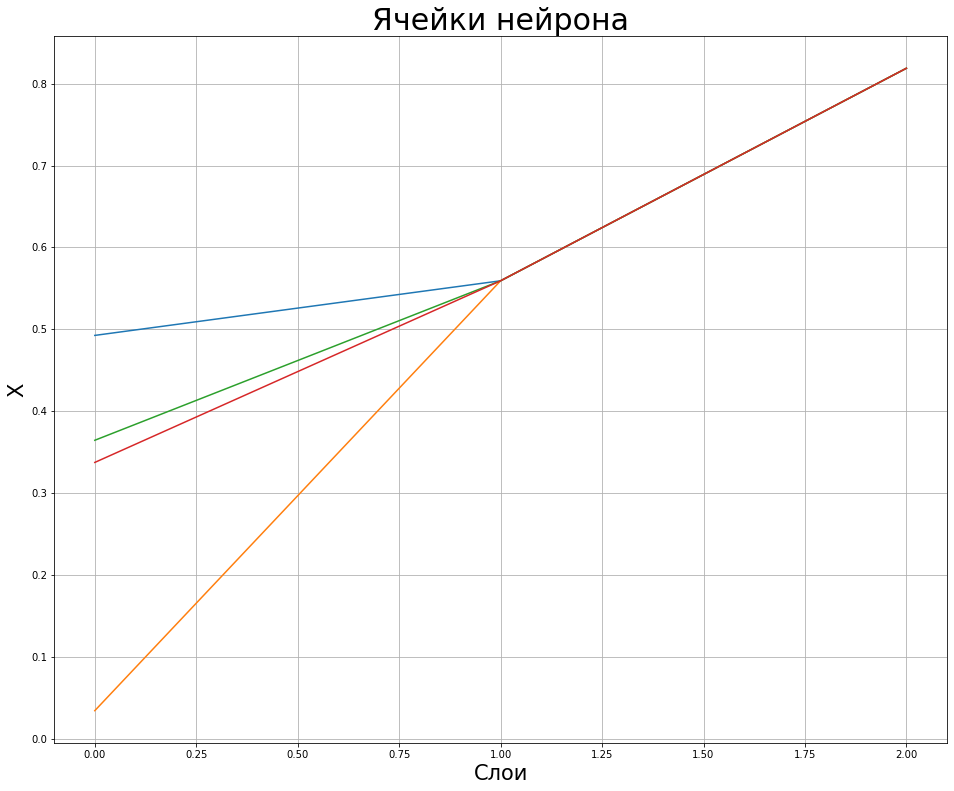

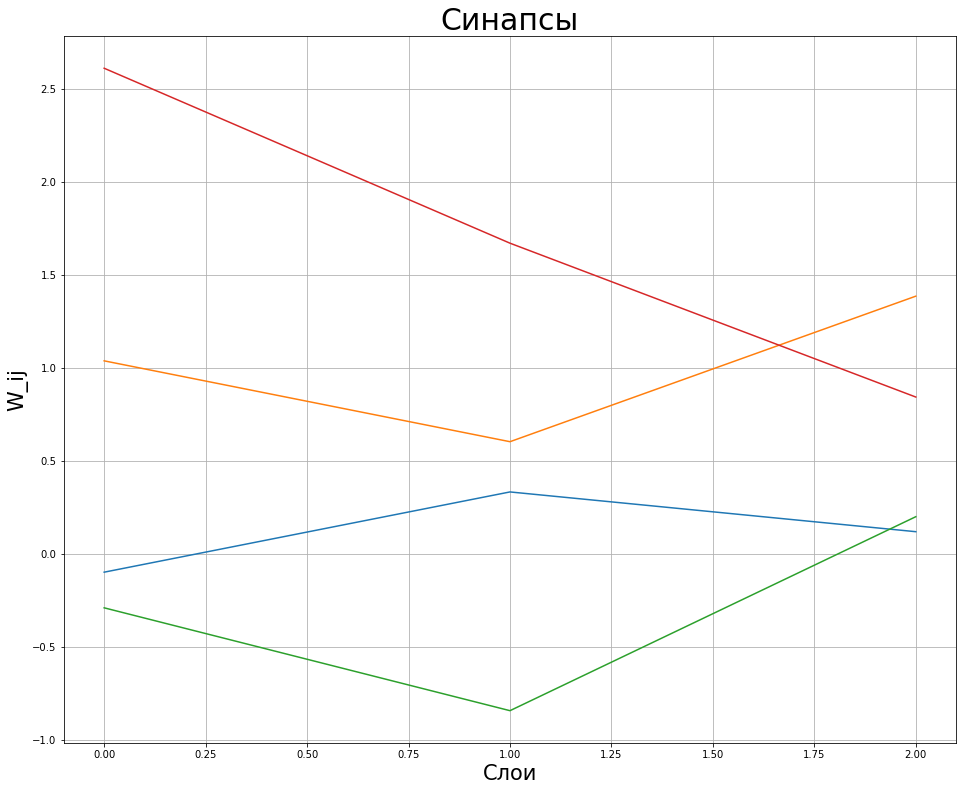

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

q = 5
n = 3
alpha = 10

w = []
for i in range(n):
    w.append([0]*(q-1))
    
p = []
for i in range(n):
    p.append([0]*(q))

x = []
for i in range(n):
    x.append([0]*(q-1))
    
d = [0]*n

def w_ij():
    for i in range(n):
        for j in range(q-1):
            w[i][j] = random.random()
    return w
            
def x_ij():
    for i in range(n):
        for j in range(q-1):
            x[i][j] = random.uniform(-0.5,0.5)
        d[i] = i/n
    return x,d       
            
def F_l(j,w):
    sum1 = 0
    for i in range(n):
        sum1 = sum1 + w[i][j]*x[i][j]
    return sum1
        
            
def x_next(w):
    for i in range(n-1):
        for j in range(q-1):
            x[i+1][j] = 1/(1 + math.exp(-F_l(i,w)))
    return x
        
def I(x,d):
    sum2 = 0
    for i in range(n):
        sum2 = sum2 + pow(x[i][q-2] - d[i],2)
    return sum2
        
def p_i(x,d,w):
    p_s = 0
    for i in range(n):
        p[i][q-1] = -2 *(x[i][q-2]-d[i])
    for j in range(q-2,-1,-1):
        for i in range(n):
            p[i][j] = p_s + p[i][j+1] * (-math.exp(-w[i][j]*x[i][j])/(1 + math.exp(-w[i][j]*x[i][j])))*w[i][j];
            p_s = p[i][j+1] * (-math.exp(-w[i][j]*x[i][j])/(1 + math.exp(-w[i][j]*x[i][j])))*w[i][j];
    return p

def gradient(w,alpha,p,x):
    for i in range(n):
        for j in range(q-1):
            w[i][j] = w[i][j] - alpha * (-p[i][j+1] * (-math.exp(-w[i][j]*x[i][j])/(1 + math.exp(-w[i][j]*x[i][j]))) * x[i][j])
    if (w[i][j] < 0): w[i][j] = 0
    if (w[i][j] > 1): w[i][j] = 1
    return w
        
#НАЧАЛО ОСНОВНОЙ ПРОГРАММЫ    
w = w_ij()
x,d = x_ij()
sum2 = I(x,d)

sum3 = sum2
w1 = w
x1 = x
d1 = d
k=0

while ((abs(sum2-sum3)>=0.0001)or(k==0)):
    sum3 = sum2
    w1 = w
    x1 = x
    d1 = d
    k+=1    
    p = p_i(x,d,w)
    k1 = 0
    while ((sum2>sum3)or(k1==0)):
        k1+=1
        sum3 = sum2
        w1 = w
        x1 = x
        d1 = d
        w = gradient(w,alpha,p,x)
        x = x_next(w)
        alpha = alpha/2;
        sum2 = I(x,d)
        
print('I = ', sum2)

fig, ax = plt.subplots();
fig.set_figwidth(16)    #  ширина и
fig.set_figheight(13)    #  высота "Figure"
ax.plot(x)
ax.set_xlabel('Слои',fontsize = 21)
ax.set_ylabel('X',fontsize = 21)
ax.set_title('Ячейки нейрона',fontsize =30);
ax.grid()

fig1, ax1 = plt.subplots();
fig1.set_figwidth(16)    #  ширина и
fig1.set_figheight(13)    #  высота "Figure"
ax1.plot(w)
ax1.set_xlabel('Слои',fontsize = 21)
ax1.set_ylabel('W_ij',fontsize = 21)
ax1.set_title('Синапсы',fontsize =30);
ax1.grid()
